In [80]:
import numpy as np
import pandas as pd
import sys
import os
import pickle
import re
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join('..')))
from src.ultils import compile_data_from_folder
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [78]:
resolved_folder_path = '/Users/irwin/Documents/GitHub/lisa-ml/data/resolved_binaries/'
resolved_df = compile_data_from_folder(resolved_folder_path)
resolved_df['Class'] = resolved_df['Name'].str.extract(r'MW_(DWD|NSWD)')
selected_features = ['Frequency', 'Amplitude', 'FrequencyDerivative', 'SNR', 'Eccentricity']

resolved_df = resolved_df.dropna(subset=selected_features + ['Class'])

# Encode labels: DWD=0, NSWD=1
label_encoder = LabelEncoder()
resolved_df['Class'] = label_encoder.fit_transform(resolved_df['Class'])

Processed file: resolved_Model2_1_MW_DWDs_aa2CE_NSWDs_aa2CE_vkick.h5
Processed file: resolved_Model2_2_MW_DWDs_aa2CE_NSWDs_aa2CE_akick.h5
Processed file: resolved_Model3_1_MW_DWDs_agCE_NSWDs_agCE_vkick.h5
Processed file: resolved_Model3_0_MW_DWDs_agCE.h5
Processed file: resolved_Model1_1_MW_DWDs_aaCE_NSWDs_aaCE_vkick.h5
Processed file: resolved_Model1_0_MW_DWDs_aaCE.h5
Processed file: resolved_Model1_2_MW_DWDs_aaCE_NSWDs_aaCE_akick.h5
Processed file: resolved_Model2_4_MW_DWDs_aa2CE_NSWDs_aa2CE_bkick.h5
Processed file: resolved_Model1_4_MW_DWDs_aaCE_NSWDs_aaCE_bkick.h5
Processed file: resolved_Model2_3_MW_DWDs_aa2CE_NSWDs_aa2CE_hkick.h5
Processed file: resolved_Model1_3_MW_DWDs_aaCE_NSWDs_aaCE_hkick.h5


In [79]:
resolved_df

,Name,Frequency,Amplitude,FrequencyDerivative,SNR,Eccentricity,Inclination,Polarization,EclipticLatitude,EclipticLongitude,InitialPhase,Model,Class
0,MW_DWD 0,0.005831,4.048406e-23,9.182991e-16,40.929675,0.000000,1.439760,0.188781,-0.358973,-1.796378,1.743567,Model 2.1,0
1,MW_DWD 305,0.001033,7.381136e-23,1.027513e-18,12.663876,0.000000,2.174727,5.567065,-0.048659,2.669358,0.614617,Model 2.1,0
2,MW_DWD 336,0.001394,1.643682e-23,3.087848e-18,7.494779,0.000000,0.396333,5.029394,-0.630509,-1.943069,1.035197,Model 2.1,0
3,MW_DWD 343,0.001563,2.131414e-23,4.695213e-18,12.629021,0.000000,0.355345,0.959902,-0.428815,-1.823988,1.642656,Model 2.1,0
4,MW_DWD 345,0.001615,1.544880e-23,5.291973e-18,9.684461,0.000000,0.416277,6.137735,-0.097106,-1.674099,0.222782,Model 2.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168721,MW_NSWD_ecc1 36818,0.001845,1.632635e-23,1.162806e-17,14.337639,0.858406,0.077106,0.315960,-0.131181,-1.551163,3.953830,Model 1.3,1
168722,MW_NSWD_ecc1 46118,0.002232,9.681620e-24,3.076622e-17,9.564295,0.615259,2.509883,5.096369,-0.483056,-2.345533,2.725020,Model 1.3,1
168723,MW_NSWD_ecc1 52477,0.002261,8.940144e-24,1.777973e-17,9.630959,0.781611,2.581236,1.463049,-0.155964,-1.767237,6.199689,Model 1.3,1
168724,MW_NSWD_ecc1 52477,0.002363,8.250590e-24,1.858790e-17,9.557340,0.781611,2.581236,1.463049,-0.155964,-1.767237,6.199689,Model 1.3,1


Demographics of my data

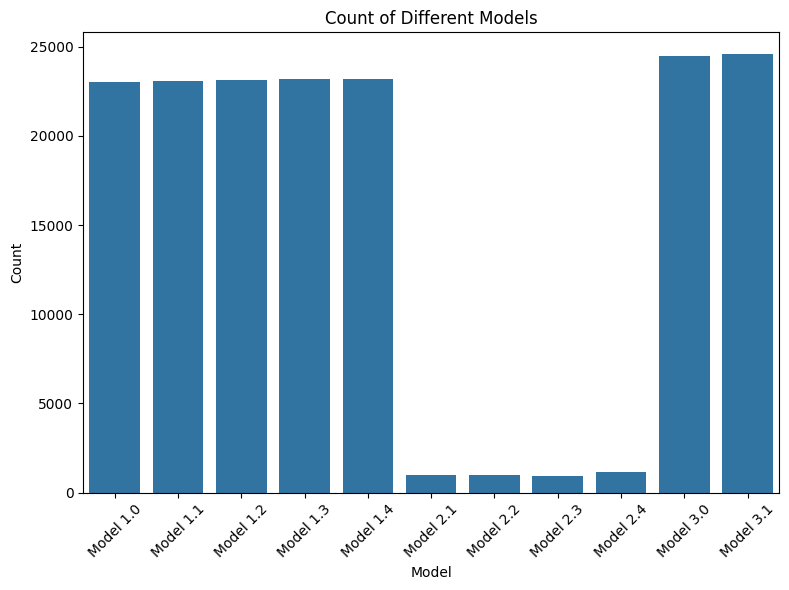

In [88]:
custom_model_order = [
    "Model 1.0", "Model 1.1", "Model 1.2", "Model 1.3", "Model 1.4", "Model 2.1", "Model 2.2", "Model 2.3", "Model 2.4", "Model 3.0", "Model 3.1"
]

plt.figure(figsize=(8, 6))
sns.countplot(data=resolved_df, x='Model', order=custom_model_order)
plt.title("Count of Different Models")
plt.xlabel("Model")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

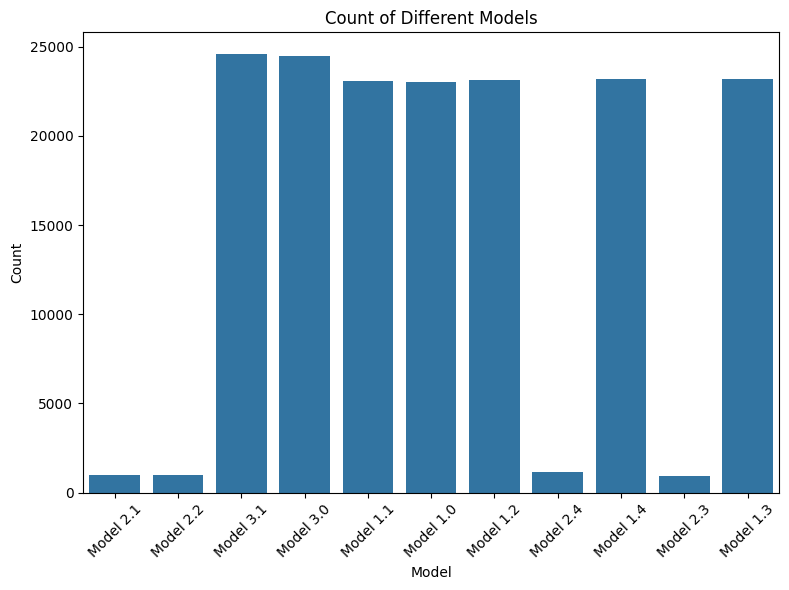

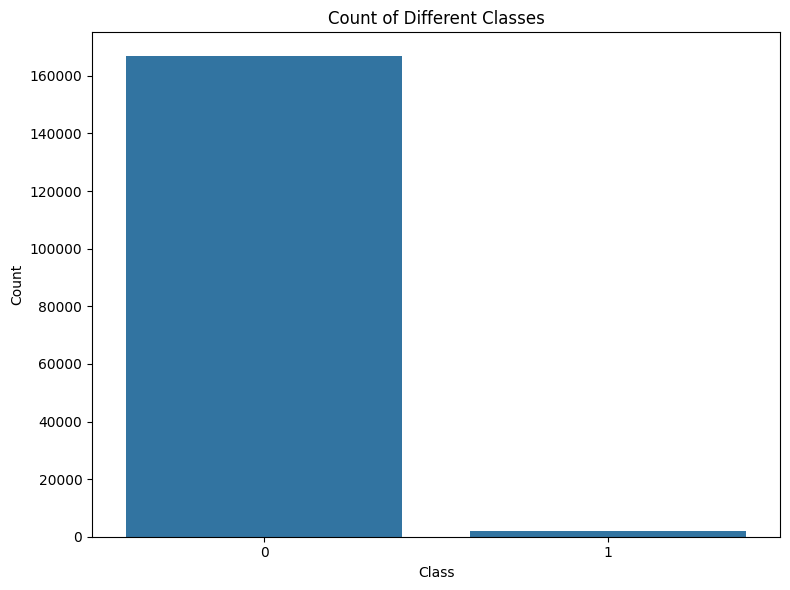

In [87]:
plt.figure(figsize=(8, 6))
sns.countplot(data=resolved_df, x='Class')
plt.title("Count of Different Classes")
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Ecc 0 only experiemtn

In [16]:
df_ecc0 = resolved_df[resolved_df["Eccentricity"] == 0].copy()

In [17]:
df_ecc0

,Name,Frequency,Amplitude,FrequencyDerivative,SNR,Eccentricity,Inclination,Polarization,EclipticLatitude,EclipticLongitude,InitialPhase,Model,Class
0,MW_DWD 0,0.005831,4.048406e-23,9.182991e-16,40.929675,0.0,1.439760,0.188781,-0.358973,-1.796378,1.743567,Model 2.1,0
1,MW_DWD 305,0.001033,7.381136e-23,1.027513e-18,12.663876,0.0,2.174727,5.567065,-0.048659,2.669358,0.614617,Model 2.1,0
2,MW_DWD 336,0.001394,1.643682e-23,3.087848e-18,7.494779,0.0,0.396333,5.029394,-0.630509,-1.943069,1.035197,Model 2.1,0
3,MW_DWD 343,0.001563,2.131414e-23,4.695213e-18,12.629021,0.0,0.355345,0.959902,-0.428815,-1.823988,1.642656,Model 2.1,0
4,MW_DWD 345,0.001615,1.544880e-23,5.291973e-18,9.684461,0.0,0.416277,6.137735,-0.097106,-1.674099,0.222782,Model 2.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168709,MW_DWD 20806003,0.002146,2.248611e-23,1.710235e-17,10.976010,0.0,1.820510,3.727881,0.045660,-1.564750,3.015512,Model 1.3,0
168710,MW_DWD 20806004,0.002343,1.906783e-23,2.360125e-17,8.900808,0.0,1.541507,1.926826,-0.389166,-1.774950,2.170191,Model 1.3,0
168711,MW_DWD 20843762,0.002578,1.597354e-23,3.133714e-17,8.383029,0.0,1.655597,2.835873,0.831667,-0.954840,6.259433,Model 1.3,0
168712,MW_DWD 20844110,0.002584,1.113195e-23,3.151605e-17,12.274131,0.0,0.813708,0.252805,0.300330,-1.385796,4.966195,Model 1.3,0


In [18]:
df_ecc0['Class'].value_counts()

Class
0    166782
1       618
Name: count, dtype: int64

In [12]:
resolved_df['Class'].value_counts()

Class
0    166782
1      1944
Name: count, dtype: int64

In [33]:
resolved_df['Weights'] = 1.0
mask = resolved_df['Class'] == 1
resolved_df.loc[mask, 'Weights'] = resolved_df.loc[mask].groupby('Name')['Name'].transform(lambda x: 1.0/len(x))

In [19]:
df_ecc0['Weights'] = df_ecc0.groupby('Name')['Name'].transform(lambda x: 1.0/len(x) if len(x) > 1 else 1.0)

In [21]:
df_ecc0[df_ecc0['Name'] == 'MW_DWD 0']

,Name,Frequency,Amplitude,FrequencyDerivative,SNR,Eccentricity,Inclination,Polarization,EclipticLatitude,EclipticLongitude,InitialPhase,Model,Class,Weights
0,MW_DWD 0,0.005831,4.048406e-23,9.182991e-16,40.929675,0.0,1.43976,0.188781,-0.358973,-1.796378,1.743567,Model 2.1,0,0.25
971,MW_DWD 0,0.005831,4.048406e-23,9.182991e-16,40.929675,0.0,1.43976,0.188781,-0.358973,-1.796378,1.743567,Model 2.2,0,0.25
120246,MW_DWD 0,0.005831,4.048406e-23,9.182991e-16,40.929675,0.0,1.43976,0.188781,-0.358973,-1.796378,1.743567,Model 2.4,0,0.25
144601,MW_DWD 0,0.005831,4.048406e-23,9.182991e-16,40.929675,0.0,1.43976,0.188781,-0.358973,-1.796378,1.743567,Model 2.3,0,0.25


In [29]:
df_ecc0[(df_ecc0['Class'] == 1) & (df_ecc0['Weights'] != 1)]

,Name,Frequency,Amplitude,FrequencyDerivative,SNR,Eccentricity,Inclination,Polarization,EclipticLatitude,EclipticLongitude,InitialPhase,Model,Class,Weights


# Resampling and increasing dataset

In [36]:
resolved_df

,Name,Frequency,Amplitude,FrequencyDerivative,SNR,Eccentricity,Inclination,Polarization,EclipticLatitude,EclipticLongitude,InitialPhase,Model,Class,Weights
0,MW_DWD 0,0.005831,4.048406e-23,9.182991e-16,40.929675,0.000000,1.439760,0.188781,-0.358973,-1.796378,1.743567,Model 2.1,0,1.000000
1,MW_DWD 305,0.001033,7.381136e-23,1.027513e-18,12.663876,0.000000,2.174727,5.567065,-0.048659,2.669358,0.614617,Model 2.1,0,1.000000
2,MW_DWD 336,0.001394,1.643682e-23,3.087848e-18,7.494779,0.000000,0.396333,5.029394,-0.630509,-1.943069,1.035197,Model 2.1,0,1.000000
3,MW_DWD 343,0.001563,2.131414e-23,4.695213e-18,12.629021,0.000000,0.355345,0.959902,-0.428815,-1.823988,1.642656,Model 2.1,0,1.000000
4,MW_DWD 345,0.001615,1.544880e-23,5.291973e-18,9.684461,0.000000,0.416277,6.137735,-0.097106,-1.674099,0.222782,Model 2.1,0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168721,MW_NSWD_ecc1 36818,0.001845,1.632635e-23,1.162806e-17,14.337639,0.858406,0.077106,0.315960,-0.131181,-1.551163,3.953830,Model 1.3,1,0.023256
168722,MW_NSWD_ecc1 46118,0.002232,9.681620e-24,3.076622e-17,9.564295,0.615259,2.509883,5.096369,-0.483056,-2.345533,2.725020,Model 1.3,1,0.200000
168723,MW_NSWD_ecc1 52477,0.002261,8.940144e-24,1.777973e-17,9.630959,0.781611,2.581236,1.463049,-0.155964,-1.767237,6.199689,Model 1.3,1,0.100000
168724,MW_NSWD_ecc1 52477,0.002363,8.250590e-24,1.858790e-17,9.557340,0.781611,2.581236,1.463049,-0.155964,-1.767237,6.199689,Model 1.3,1,0.100000


In [19]:
folder_path = '/Users/irwin/Documents/GitHub/lisa-ml/data/fims'

def load_fim_data(folder_path):
    """
    Loads all pickle files from the specified folder and returns a dictionary
    with keys formatted as "Model X.Y" and values as the loaded data.

    Parameters:
      folder_path (str): Path to the folder containing the pickle files.

    Returns:
      dict: Dictionary where keys are formatted model strings and values are the loaded data.
    """
    loaded_data = {}
    for filename in os.listdir(folder_path):
        if filename.endswith('.pkl') or filename.endswith('.pickle'):
            file_path = os.path.join(folder_path, filename)
            # Format the model string from the filename.
            formatted = re.sub(r".*?(Model)(\d+)_(\d+).*", r"\1 \2.\3", filename)
            with open(file_path, 'rb') as file:
                data = pickle.load(file)
            loaded_data[formatted] = data
    return loaded_data

In [20]:
loaded_data = load_fim_data(folder_path)

In [34]:
loaded_data['Model 2.1']['MW_DWD 360']
cov = np.linalg.inv(loaded_data['Model 2.1']['MW_DWD 360'])

In [35]:
cov

array([[ 4.06030712e-14, -1.71205082e-09, -1.44532475e-10,
         1.73966378e-11, -5.61681701e-09, -6.02772855e-09,
        -1.60423110e-06,  3.21442925e-06],
       [-1.71205082e-09,  7.92194484e-05,  8.88440027e-06,
        -7.27686124e-07,  4.01859894e-04,  1.14934056e-05,
         1.83832114e-01, -3.67874213e-01],
       [-1.44532475e-10,  8.88440027e-06,  2.02222544e-04,
        -1.11826453e-06, -4.15648492e-03,  1.22382750e-03,
        -2.01596679e+00,  4.03190966e+00],
       [ 1.73966378e-11, -7.27686124e-07, -1.11826453e-06,
         3.69303342e-06,  8.28429768e-03, -2.17642114e-03,
         3.96989533e+00, -7.93975006e+00],
       [-5.61681541e-09,  4.01859852e-04, -4.15648529e-03,
         8.28429836e-03,  1.37419765e+03,  3.47639567e+02,
         5.26519557e+05, -1.05303406e+06],
       [-6.02772891e-09,  1.14934456e-05,  1.22382706e-03,
        -2.17642029e-03,  3.47639685e+02,  8.15524405e+02,
        -2.34960017e+03,  4.69920479e+03],
       [-1.60423077e-06,  1.838321

Transforming dataframe

In [90]:
# Transformations
resolved_df['Frequency_mHz'] = resolved_df['Frequency'] * 1000
resolved_df['FrequencyDerivative_log10'] = np.log10(resolved_df['FrequencyDerivative'])
resolved_df['EclipticLatitude_sin'] = np.sin(resolved_df['EclipticLatitude'])
resolved_df['Amplitude_log10'] = np.log10(resolved_df['Amplitude'])
resolved_df['Inclination_cos'] = np.cos(resolved_df['Inclination'])

# Remove the original columns if they're no longer needed.
cols_to_remove = ['Frequency', 'FrequencyDerivative', 'EclipticLatitude', 'Amplitude', 'Inclination']
resolved_df.drop(columns=cols_to_remove, inplace=True)


In [105]:
resolved_df[(resolved_df['Frequency_mHz'] < 0.3) & (resolved_df['SNR'] < 10)]

,Name,SNR,Eccentricity,Polarization,EclipticLongitude,InitialPhase,Model,Class,Frequency_mHz,FrequencyDerivative_log10,EclipticLatitude_sin,Amplitude_log10,Inclination_cos
1856,MW_NSWD_ecc1 16223,9.491517,0.508884,5.365058,-1.625692,5.887207,Model 2.2,1,0.232742,-19.259975,-0.091029,-20.873072,0.887970
11824,MW_DWD 21588846,8.125388,0.000000,1.025876,0.270513,1.306348,Model 3.1,0,0.272781,-19.484973,0.932744,-21.035029,-0.807246
13696,MW_DWD 25585766,8.022306,0.000000,6.195913,-2.659111,4.375689,Model 3.1,0,0.287269,-19.491484,0.780839,-21.006100,0.583351
36459,MW_DWD 21588846,8.125388,0.000000,1.025876,0.270513,1.306348,Model 3.0,0,0.272781,-19.484973,0.932744,-21.035029,-0.807246
38342,MW_DWD 25585766,8.022306,0.000000,6.195913,-2.659111,4.375689,Model 3.0,0,0.287269,-19.491484,0.780839,-21.006100,0.583351
56108,MW_DWD 8295985,9.431897,0.000000,2.692928,2.151224,4.721792,Model 1.1,0,0.259639,-20.014958,-0.681720,-21.031106,-0.999494
57019,MW_DWD 9725494,9.323625,0.000000,5.144891,-2.628324,4.200341,Model 1.1,0,0.270452,-19.898139,0.993280,-20.979777,-0.860769
61612,MW_DWD 17424163,8.913939,0.000000,4.241760,-0.520957,1.452620,Model 1.1,0,0.209232,-20.395252,-0.494977,-20.809936,0.992127
79233,MW_DWD 8295985,9.431897,0.000000,2.692928,2.151224,4.721792,Model 1.0,0,0.259639,-20.014958,-0.681720,-21.031106,-0.999494
80151,MW_DWD 9725494,9.323625,0.000000,5.144891,-2.628324,4.200341,Model 1.0,0,0.270452,-19.898139,0.993280,-20.979777,-0.860769


In [119]:
def sample_from_FIM(row, loaded_fim_data, n_samples_class0=10, n_samples_class1=10):
    if row['Model'].endswith('.0'):
        return None

    mean = np.array([
        row['Frequency_mHz'],            
        row['FrequencyDerivative_log10'],
        row['EclipticLatitude_sin'],    
        row['EclipticLongitude'],            
        row['Amplitude_log10'],           
        row['Inclination_cos'],         
        row['Polarization'],                 
        row['InitialPhase']                  
    ])
    
    model_key = row['Model']
    
    try:
        fim = loaded_fim_data[model_key][row['Name']]
    except KeyError:
        raise KeyError(f"FIM not found for model '{model_key}' and source '{row['Name']}'")
    
    cov = np.linalg.inv(fim)
    
    if row['Class'] == 0:
        n_samples = n_samples_class0
    elif row['Class'] == 1:
        n_samples = n_samples_class1
    else:
        n_samples = n_samples_class0

    samples = np.random.multivariate_normal(mean, cov, size=n_samples)
    return samples




In [120]:
samples_dict = {}
for idx, row in resolved_df.iterrows():
    samples = sample_from_FIM(row, loaded_data, n_samples_class0=1, n_samples_class1=20)
    if samples is None:
        continue  
    key = (row['Name'], row['Model'])
    samples_dict[key] = {'samples': samples, 'Name': row['Name'], 'Model': row['Model']}

parameter_names = ['Frequency_mHz', 'FrequencyDerivative_log10', 'EclipticLatitude_sin',
                   'EclipticLongitude', 'Amplitude_log10', 'Inclination_cos', 'Polarization', 'InitialPhase']

df_list = []
for data in samples_dict.values():
    samples = data['samples']
    model = data['Model']
    name = data['Name']
    df_temp = pd.DataFrame(samples, columns=parameter_names)
    df_temp['Name'] = name
    df_temp['Model'] = model
    df_list.append(df_temp)

final_df = pd.concat(df_list, ignore_index=True)
print(final_df.head())

/var/folders/rm/5j_dp79x6xx6xmxlxxs9k4y80000gn/T/ipykernel_91295/3098574776.py:32: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples = np.random.multivariate_normal(mean, cov, size=n_samples)


   Frequency_mHz  FrequencyDerivative_log10  EclipticLatitude_sin  \
0       5.831487                 -15.034373             -0.359252   
1       1.032685                 -19.254352              0.089707   
2       1.394107                 -18.550330             -0.497856   
3       1.562900                 -14.951057             -0.386920   
4       1.614743                 -17.761380             -0.242502   

   EclipticLongitude  Amplitude_log10  Inclination_cos  Polarization  \
0          -1.797647       -22.398801         0.129582      0.167631   
1           2.676605       -22.124469        -0.569052      5.093521   
2          -1.961395       -21.059690        -3.152977      3.173578   
3          -1.863188       -23.075929         1.737700     -1.630538   
4          -1.627740       -22.967748         1.492779     26.391803   

   InitialPhase        Name      Model  
0      1.661965    MW_DWD 0  Model 2.1  
1      1.437500  MW_DWD 305  Model 2.1  
2     -2.187718  MW_DWD 336  

In [125]:
final_df

,Frequency_mHz,FrequencyDerivative_log10,EclipticLatitude_sin,EclipticLongitude,Amplitude_log10,Inclination_cos,Polarization,InitialPhase,Name,Model
0,5.831487,-15.034373,-0.359252,-1.797647,-22.398801,0.129582,0.167631,1.661965,MW_DWD 0,Model 2.1
1,1.032685,-19.254352,0.089707,2.676605,-22.124469,-0.569052,5.093521,1.437500,MW_DWD 305,Model 2.1
2,1.394107,-18.550330,-0.497856,-1.961395,-21.059690,-3.152977,3.173578,-2.187718,MW_DWD 336,Model 2.1
3,1.562900,-14.951057,-0.386920,-1.863188,-23.075929,1.737700,-1.630538,-4.072197,MW_DWD 343,Model 2.1
4,1.614743,-17.761380,-0.242502,-1.627740,-22.967748,1.492779,26.391803,40.759983,MW_DWD 345,Model 2.1
...,...,...,...,...,...,...,...,...,...,...
147492,2.441918,-16.346078,0.445848,-0.989276,-22.893162,0.253943,16.953022,34.413662,MW_NSWD_ecc1 34888,Model 1.3
147493,2.441917,-16.231647,0.401486,-0.991029,-23.254186,1.004478,-1.236646,-2.169858,MW_NSWD_ecc1 34888,Model 1.3
147494,2.441919,-16.364838,0.523406,-0.999022,-21.208490,-3.539534,-20.643227,-40.295108,MW_NSWD_ecc1 34888,Model 1.3
147495,2.441919,-16.433632,0.364704,-0.982426,-24.978781,4.788403,2.783462,6.138701,MW_NSWD_ecc1 34888,Model 1.3


In [126]:
resolved_df['Source'] = 'Original'
final_df['Source'] = 'Sample'

combined_df = pd.concat([resolved_df, final_df], ignore_index=True)

print(combined_df.head())

         Name        SNR  Eccentricity  Polarization  EclipticLongitude  \
0    MW_DWD 0  40.929675           0.0      0.188781          -1.796378   
1  MW_DWD 305  12.663876           0.0      5.567065           2.669358   
2  MW_DWD 336   7.494779           0.0      5.029394          -1.943069   
3  MW_DWD 343  12.629021           0.0      0.959902          -1.823988   
4  MW_DWD 345   9.684461           0.0      6.137735          -1.674099   

   InitialPhase      Model  Class  Weights  Frequency_mHz  \
0      1.743567  Model 2.1    0.0      1.0       5.831488   
1      0.614617  Model 2.1    0.0      1.0       1.032685   
2      1.035197  Model 2.1    0.0      1.0       1.394106   
3      1.642656  Model 2.1    0.0      1.0       1.562902   
4      0.222782  Model 2.1    0.0      1.0       1.614743   

   FrequencyDerivative_log10  EclipticLatitude_sin  Amplitude_log10  \
0                 -15.037016             -0.351313       -22.392716   
1                 -17.988213            

In [129]:
combined_df['Weights'] = combined_df.groupby('Name')['Name'].transform(lambda x: 1.0/len(x) if len(x) > 1 else 1.0)

In [130]:
combined_df[combined_df['Name'] == 'MW_NSWD_ecc1 34888']

,Name,SNR,Eccentricity,Polarization,EclipticLongitude,InitialPhase,Model,Class,Weights,Frequency_mHz,FrequencyDerivative_log10,EclipticLatitude_sin,Amplitude_log10,Inclination_cos,Source
168719,MW_NSWD_ecc1 34888,7.545206,0.335839,0.674586,-1.002460,1.998297,Model 1.3,1.0,0.047619,2.441919,-16.603076,0.454094,-23.233867,0.919796,Original
316203,MW_NSWD_ecc1 34888,NaN,NaN,8.548592,-0.935408,18.140482,Model 1.3,NaN,0.047619,2.441921,-17.120183,0.528218,-22.035005,-1.697180,Sample
316204,MW_NSWD_ecc1 34888,NaN,NaN,-3.455427,-0.969904,-6.971055,Model 1.3,NaN,0.047619,2.441915,-15.799197,0.438329,-25.518667,5.830110,Sample
316205,MW_NSWD_ecc1 34888,NaN,NaN,-22.687565,-1.030111,-44.730999,Model 1.3,NaN,0.047619,2.441918,-16.212519,0.444102,-25.313384,5.188312,Sample
316206,MW_NSWD_ecc1 34888,NaN,NaN,-20.417521,-1.002437,-39.469060,Model 1.3,NaN,0.047619,2.441923,-17.596224,0.444261,-23.382361,1.272024,Sample
316207,MW_NSWD_ecc1 34888,NaN,NaN,-13.429735,-1.006931,-26.302432,Model 1.3,NaN,0.047619,2.441918,-16.522337,0.503086,-25.499057,5.900255,Sample
316208,MW_NSWD_ecc1 34888,NaN,NaN,-12.740844,-1.001893,-24.545669,Model 1.3,NaN,0.047619,2.441919,-16.589298,0.502868,-23.111668,0.672622,Sample
316209,MW_NSWD_ecc1 34888,NaN,NaN,0.023226,-0.951457,1.672300,Model 1.3,NaN,0.047619,2.441923,-17.458484,0.458736,-24.113289,3.195306,Sample
316210,MW_NSWD_ecc1 34888,NaN,NaN,7.154363,-1.038525,15.064387,Model 1.3,NaN,0.047619,2.441919,-16.503240,0.350117,-22.081607,-1.695241,Sample
316211,MW_NSWD_ecc1 34888,NaN,NaN,-31.366424,-1.015453,-62.262772,Model 1.3,NaN,0.047619,2.441919,-16.596954,0.440213,-23.908172,2.440531,Sample


In [131]:
def fill_with_original(group):

    group = group.sort_values(by='Source', key=lambda x: x.map({'Original': 0, 'Sample': 1}))
    original = group.iloc[0]
    return group.fillna(original)

combined_df_filled = combined_df.groupby('Name').apply(fill_with_original).reset_index(drop=True)

print(combined_df_filled.head())

       Name        SNR  Eccentricity  Polarization  EclipticLongitude  \
0  MW_DWD 0  40.929675           0.0      0.188781          -1.796378   
1  MW_DWD 0  40.929675           0.0      0.188781          -1.796378   
2  MW_DWD 0  40.929675           0.0      0.188781          -1.796378   
3  MW_DWD 0  40.929675           0.0      0.188781          -1.796378   
4  MW_DWD 0  40.929675           0.0      0.167631          -1.797647   

   InitialPhase      Model  Class  Weights  Frequency_mHz  \
0      1.743567  Model 2.1    0.0    0.125       5.831488   
1      1.743567  Model 2.2    0.0    0.125       5.831488   
2      1.743567  Model 2.4    0.0    0.125       5.831488   
3      1.743567  Model 2.3    0.0    0.125       5.831488   
4      1.661965  Model 2.1    0.0    0.125       5.831487   

   FrequencyDerivative_log10  EclipticLatitude_sin  Amplitude_log10  \
0                 -15.037016             -0.351313       -22.392716   
1                 -15.037016             -0.351313  

/var/folders/rm/5j_dp79x6xx6xmxlxxs9k4y80000gn/T/ipykernel_91295/3657673621.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  combined_df_filled = combined_df.groupby('Name').apply(fill_with_original).reset_index(drop=True)


In [133]:
combined_df_filled[combined_df_filled['Name'] == 'MW_NSWD_ecc1 34888']

,Name,SNR,Eccentricity,Polarization,EclipticLongitude,InitialPhase,Model,Class,Weights,Frequency_mHz,FrequencyDerivative_log10,EclipticLatitude_sin,Amplitude_log10,Inclination_cos,Source
308083,MW_NSWD_ecc1 34888,7.545206,0.335839,0.674586,-1.002460,1.998297,Model 1.3,1.0,0.047619,2.441919,-16.603076,0.454094,-23.233867,0.919796,Original
308084,MW_NSWD_ecc1 34888,7.545206,0.335839,-20.643227,-0.999022,-40.295108,Model 1.3,1.0,0.047619,2.441919,-16.364838,0.523406,-21.208490,-3.539534,Sample
308085,MW_NSWD_ecc1 34888,7.545206,0.335839,-1.236646,-0.991029,-2.169858,Model 1.3,1.0,0.047619,2.441917,-16.231647,0.401486,-23.254186,1.004478,Sample
308086,MW_NSWD_ecc1 34888,7.545206,0.335839,16.953022,-0.989276,34.413662,Model 1.3,1.0,0.047619,2.441918,-16.346078,0.445848,-22.893162,0.253943,Sample
308087,MW_NSWD_ecc1 34888,7.545206,0.335839,2.654502,-0.916458,6.375097,Model 1.3,1.0,0.047619,2.441920,-16.717504,0.484944,-21.667304,-2.672540,Sample
308088,MW_NSWD_ecc1 34888,7.545206,0.335839,-9.162246,-0.962929,-17.967752,Model 1.3,1.0,0.047619,2.441918,-16.209109,0.469885,-24.280095,3.247592,Sample
308089,MW_NSWD_ecc1 34888,7.545206,0.335839,9.717052,-1.003590,20.673209,Model 1.3,1.0,0.047619,2.441921,-16.789099,0.488665,-20.881984,-4.357361,Sample
308090,MW_NSWD_ecc1 34888,7.545206,0.335839,12.808304,-0.997230,26.431415,Model 1.3,1.0,0.047619,2.441921,-17.095535,0.416979,-25.569243,6.297258,Sample
308091,MW_NSWD_ecc1 34888,7.545206,0.335839,8.641676,-0.964793,17.584814,Model 1.3,1.0,0.047619,2.441917,-16.093790,0.478435,-21.776999,-2.362795,Sample
308092,MW_NSWD_ecc1 34888,7.545206,0.335839,2.783462,-0.982426,6.138701,Model 1.3,1.0,0.047619,2.441919,-16.433632,0.364704,-24.978781,4.788403,Sample


In [65]:
cov = np.array([[ 4.06030712e-14, -1.71205082e-09, -1.44532475e-10,
         1.73966378e-11, -5.61681621e-09, -6.02772873e-09,
        -1.60423094e-06,  3.21442870e-06],
       [-1.71205082e-09,  7.92194484e-05,  8.88440027e-06,
        -7.27686124e-07,  4.01859873e-04,  1.14934256e-05,
         1.83832107e-01, -3.67874194e-01],
       [-1.44532475e-10,  8.88440027e-06,  2.02222544e-04,
        -1.11826453e-06, -4.15648510e-03,  1.22382728e-03,
        -2.01596683e+00,  4.03190973e+00],
       [ 1.73966378e-11, -7.27686124e-07, -1.11826453e-06,
         3.69303342e-06,  8.28429802e-03, -2.17642071e-03,
         3.96989539e+00, -7.93975019e+00],
       [-5.61681621e-09,  4.01859873e-04, -4.15648510e-03,
         8.28429802e-03,  1.37419765e+03,  3.47639626e+02,
         5.26519547e+05, -1.05303404e+06],
       [-6.02772873e-09,  1.14934256e-05,  1.22382728e-03,
        -2.17642071e-03,  3.47639626e+02,  8.15524405e+02,
        -2.34962401e+03,  4.69925357e+03],
       [-1.60423094e-06,  1.83832107e-01, -2.01596683e+00,
         3.96989539e+00,  5.26519547e+05, -2.34962401e+03,
         2.26986406e+08, -4.53970640e+08],
       [ 3.21442870e-06, -3.67874194e-01,  4.03190973e+00,
        -7.93975019e+00, -1.05303404e+06,  4.69925357e+03,
        -4.53970640e+08,  9.07936935e+08]])
mean = np.array([ 4.03403642e+00, -1.58183822e+01,  1.24110320e-02, -1.64649629e+00,
       -2.25292952e+01, -9.99031405e-01,  2.67567689e+00,  4.13214526e+00])

In [55]:
cov = (cov + cov.T) / 2

In [69]:
def nearest_positive_semidefinite(A):
    # Force symmetry
    B = (A + A.T) / 2
    # Eigen-decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(B)
    # Set any negative eigenvalues to a small non-negative value
    eigenvalues[eigenvalues < 0] = 0
    # Reconstruct the matrix
    A_psd = eigenvectors @ np.diag(eigenvalues) @ eigenvectors.T
    # Optionally, add a small jitter to ensure positive definiteness
    eps = 1e-6
    A_psd += np.eye(A.shape[0]) * eps
    return A_psd



In [70]:
cov = np.linalg.inv(loaded_data['Model 2.1']['MW_DWD 360'])
cov_fixed = nearest_positive_semidefinite(cov)

In [71]:
eigenvalues, _ = np.linalg.eig(cov_fixed)
print("Eigenvalues:", eigenvalues)

# Check for any small negative eigenvalues:
tolerance_eig = 1e-8
if np.any(eigenvalues < -tolerance_eig):
    print("Significant negative eigenvalues detected.")
else:
    print("Negative eigenvalues are small; likely due to numerical imprecision.")

Eigenvalues: [9.53674316e-07 1.13492456e+09 9.68378454e+02 3.11889167e-04
 2.03371547e-04 4.45372322e-05 2.62950270e-05 4.43525853e-06]
Negative eigenvalues are small; likely due to numerical imprecision.


In [73]:
cov = (cov_fixed + cov_fixed.T) / 2

In [75]:
cov

array([[ 1.00000004e-06, -1.71205082e-09, -1.44532475e-10,
         1.73966378e-11, -5.61681621e-09, -6.02772873e-09,
        -1.60423094e-06,  3.21442870e-06],
       [-1.71205082e-09,  8.02340972e-05,  8.88950208e-06,
        -7.57695940e-07,  4.01839032e-04,  1.15024488e-05,
         1.83832118e-01, -3.67874399e-01],
       [-1.44532475e-10,  8.88950208e-06,  2.03340374e-04,
        -1.11203368e-06, -4.15647842e-03,  1.22382410e-03,
        -2.01596681e+00,  4.03190974e+00],
       [ 1.73966378e-11, -7.57695940e-07, -1.11203368e-06,
         4.52336582e-06,  8.28444434e-03, -2.17648406e-03,
         3.96989528e+00, -7.93975025e+00],
       [-5.61681621e-09,  4.01839032e-04, -4.15647842e-03,
         8.28444434e-03,  1.37419765e+03,  3.47639626e+02,
         5.26519547e+05, -1.05303404e+06],
       [-6.02772873e-09,  1.15024488e-05,  1.22382410e-03,
        -2.17648406e-03,  3.47639626e+02,  8.15524406e+02,
        -2.34962401e+03,  4.69925357e+03],
       [-1.60423094e-06,  1.838321

In [74]:
samples = np.random.multivariate_normal(mean, cov, size=5)

/var/folders/rm/5j_dp79x6xx6xmxlxxs9k4y80000gn/T/ipykernel_64442/993413854.py:1: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples = np.random.multivariate_normal(mean, cov, size=5)


In [10]:
samples

array([[ 2.92318176e+00, -1.64176079e+01, -2.09620268e-01,
        -1.65447756e+00, -1.91814644e+01, -7.85984271e+00,
        -5.10104152e+02, -1.01605035e+03],
       [ 2.92318181e+00, -1.63220504e+01, -2.30612169e-01,
        -1.65897448e+00, -1.84392914e+01, -8.18336487e+00,
         4.33459682e+02,  8.71015267e+02],
       [ 2.92318203e+00, -1.63934077e+01, -1.92156605e-01,
        -1.65690320e+00, -2.47546879e+01,  4.65305771e+00,
        -7.33815324e+02, -1.46348301e+03],
       [ 2.92318177e+00, -1.63302821e+01, -2.03675451e-01,
        -1.66487557e+00, -2.24805197e+01,  8.24072847e-01,
         2.33130662e+02,  4.70387133e+02],
       [ 2.92318198e+00, -1.64342645e+01, -2.22023693e-01,
        -1.65954910e+00, -2.43604728e+01,  5.96864690e+00,
         7.61764833e+02,  1.52773465e+03]])